In [1]:
#import jax.numpy as np
#from jax import pmap
import numpy as np
from maxnorm.maxnorm_completion import *
from maxnorm.tenalg import *
from maxnorm.graphs import *
import sparse
from itertools import product
import networkx as nx

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%load_ext autoreload

In [2]:
# create random, low-rank tensor
t = 5
n = 30
r = 3
#delta = 0.1
const = 24
sigma = 0.005
ndata =  const * r * t * n * np.log10(n)
U = kr_random(n, t, r, rvs='unif')
U = kr_rescale(U, np.sqrt(n**t), 'hs')
norm_true = np.sqrt(kr_dot(U, U) / n**t)
#U = [np.random.randn(n, r) for i in range(t)]
print("n data: %.2e" % ndata)
print("n data ** t/2: %.2e" % int(const * r * n**(t/2) * np.log10(n)))
print("true norm: %.2e" % norm_true)

n data: 3.60e+03
n data ** t/2: 2.28e+04
true norm: 1.00e+00


In [3]:
qnorm_true = max_qnorm_ub(U)
print(qnorm_true)
print(r**(t/2))

39.54340431504887
15.588457268119896


In [4]:
expander = nx.random_regular_graph(6, n)
#expander = nx.chordal_cycle_graph(n)
observation_mask = obs_mask_expander(expander, t)
#observation_mask = obs_mask_iid(tuple([n for i in range(t)]), ndata * n**(-t))

In [5]:
from run_sweep_iid import generate_data


data = generate_data(observation_mask, U, sigma)
clean_data_rmse = np.sqrt(loss(U, data) / data.nnz)
print(data.nnz)
print(ndata)
print(n**t)
print("%0.1e%%" % (float(data.nnz) / n**t * 100))

/home/kamdh/local/anaconda3/lib/python3.7/site-packages/numba/core/dispatcher.py:238: UserWarning: Numba extension module 'sparse._numba_extension' failed to load due to 'ModuleNotFoundError(No module named 'numba.targets')'.
  entrypoints.init_all()


12960
3600.0
100000
1.3e+01%


In [6]:
np.sqrt(data.sum()**2 / data.nnz)

0.20366009507490393

In [7]:
data.coords

array([[0, 0, 0, ..., 9, 9, 9],
       [2, 2, 2, ..., 8, 8, 8],
       [0, 0, 0, ..., 9, 9, 9],
       [2, 2, 2, ..., 8, 8, 8],
       [0, 4, 5, ..., 4, 5, 9]])

In [8]:
delta = 1.5 * sigma
#np.sqrt(np.sum((data.data - clean_data)**2)) * 2 / np.sqrt(data.nnz) * 1.5

print("rms of data:        %f" % clean_data_rmse)
print("delta parameter:    %f" % delta)
print("rmse of U true:     %f" % np.sqrt(loss(U, data) / data.nnz))

rms of data:        0.005053
delta parameter:    0.007500
rmse of U true:     0.005053


In [9]:
# from tensorly.contrib.sparse.decomposition import parafac

# mask = data != 0
# core, factors = parafac(data, r, mask=mask, init='random', verbose=True, tol=1e-3, n_iter_max=8)
# scale_mat = np.diag(core.todense()**(1/t))
# U = [factors[i].todense() @ scale_mat for i in range(t)]

#Unew = [np.hstack((U, np.random.randn(n,r**(t-1)))) for U in Unew2]

In [10]:
%autoreload
Unew1, cost_arr = tensor_completion_alt_min(data, 2 * r**t,
                                            #sgd=True, sgd_batch_size=2000,
                                            #U0 = Unew2,
                                            init='svdrand', 
                                            tol=1e-10, max_iter=10*n, verbosity=2)

Initial cost: 6.666e+03
|| r || = 1.013e+00

Entering inner loop for factor 0
Entering inner loop for factor 1
Entering inner loop for factor 2
Entering inner loop for factor 3
Entering inner loop for factor 4

Iteration 0 complete
|| resid || = 1.274e-01
Cost :        3.814e+02

Entering inner loop for factor 0
Entering inner loop for factor 1
Entering inner loop for factor 2
Entering inner loop for factor 3
Entering inner loop for factor 4

Iteration 1 complete
|| resid || = 3.891e-02
Cost :        1.680e+02

Entering inner loop for factor 0
Entering inner loop for factor 1
Entering inner loop for factor 2
Entering inner loop for factor 3
Entering inner loop for factor 4

Iteration 2 complete
|| resid || = 2.549e-02
Cost :        1.312e+02

Entering inner loop for factor 0
Entering inner loop for factor 1
Entering inner loop for factor 2
Entering inner loop for factor 3
Entering inner loop for factor 4

Iteration 3 complete
|| resid || = 2.048e-02
Cost :        1.146e+02

Entering in


Iteration 27 complete
|| resid || = 6.605e-03
Cost :        5.329e+01

Entering inner loop for factor 0
Entering inner loop for factor 1
Entering inner loop for factor 2
Entering inner loop for factor 3
Entering inner loop for factor 4

Iteration 28 complete
|| resid || = 6.455e-03
Cost :        5.242e+01

Entering inner loop for factor 0
Entering inner loop for factor 1
Entering inner loop for factor 2
Entering inner loop for factor 3
Entering inner loop for factor 4

Iteration 29 complete
|| resid || = 6.361e-03
Cost :        5.158e+01

Entering inner loop for factor 0
Entering inner loop for factor 1
Entering inner loop for factor 2
Entering inner loop for factor 3
Entering inner loop for factor 4

Iteration 30 complete
|| resid || = 6.274e-03
Cost :        5.074e+01

Entering inner loop for factor 0
Entering inner loop for factor 1
Entering inner loop for factor 2
Entering inner loop for factor 3
Entering inner loop for factor 4

Iteration 31 complete
|| resid || = 6.207e-03
Cost 

Entering inner loop for factor 2
Entering inner loop for factor 3
Entering inner loop for factor 4

Iteration 55 complete
|| resid || = 5.378e-03
Cost :        3.608e+01

Entering inner loop for factor 0
Entering inner loop for factor 1
Entering inner loop for factor 2
Entering inner loop for factor 3
Entering inner loop for factor 4

Iteration 56 complete
|| resid || = 5.377e-03
Cost :        3.568e+01

Entering inner loop for factor 0
Entering inner loop for factor 1
Entering inner loop for factor 2
Entering inner loop for factor 3
Entering inner loop for factor 4

Iteration 57 complete
|| resid || = 5.321e-03
Cost :        3.531e+01

Entering inner loop for factor 0
Entering inner loop for factor 1
Entering inner loop for factor 2
Entering inner loop for factor 3
Entering inner loop for factor 4

Iteration 58 complete
|| resid || = 5.277e-03
Cost :        3.495e+01

Entering inner loop for factor 0
Entering inner loop for factor 1
Entering inner loop for factor 2
Entering inner loop

Entering inner loop for factor 1
Entering inner loop for factor 2
Entering inner loop for factor 3
Entering inner loop for factor 4

Iteration 83 complete
|| resid || = 5.205e-03
Cost :        2.732e+01

Entering inner loop for factor 0
Entering inner loop for factor 1
Entering inner loop for factor 2
Entering inner loop for factor 3
Entering inner loop for factor 4

Iteration 84 complete
|| resid || = 5.226e-03
Cost :        2.709e+01

Entering inner loop for factor 0
Entering inner loop for factor 1
Entering inner loop for factor 2
Entering inner loop for factor 3
Entering inner loop for factor 4

Iteration 85 complete
|| resid || = 5.201e-03
Cost :        2.687e+01

Entering inner loop for factor 0
Entering inner loop for factor 1
Entering inner loop for factor 2
Entering inner loop for factor 3
Entering inner loop for factor 4

Iteration 86 complete
|| resid || = 5.293e-03
Cost :        2.663e+01

Entering inner loop for factor 0
Entering inner loop for factor 1
Entering inner loop

In [11]:
def print_factor_norms(U):
    print("fro:   " + str([np.linalg.norm(Ui,'fro')**2 for Ui in U]))
    print("2-inf: " + str([np.max(np.linalg.norm(Ui, axis=1)) for Ui in U]))

print_factor_norms(kr_balance_factors(U))

fro:   [24.025627493520936, 24.025627493520936, 24.025627493520936, 24.025627493520943, 24.025627493520936]
2-inf: [2.1460921136395767, 2.2672703631623126, 2.0955134315561073, 1.8359328217700468, 2.0602575607025315]


In [12]:
12**4

20736

In [13]:
#Uinit = kr_rescale(Unew1, np.sqrt(np.product(data.shape) * data.sum() ** 2 / data.nnz), 'hs')
Uinit = kr_balance_factors(Unew1)

In [14]:
[np.linalg.norm(Ui, axis=1) for Ui in Uinit]

[array([2.79059284, 1.3109111 , 4.0812983 , 5.05791038, 2.4190429 ,
        4.21679141, 5.04565085, 2.20998752, 2.98556674, 4.72559873],
       dtype=float128),
 array([4.21283537, 4.06289726, 3.73745854, 2.47307714, 1.56944151,
        3.4358623 , 2.91730227, 4.73170774, 4.88867722, 3.68225236],
       dtype=float128),
 array([1.93990524, 4.54116549, 3.60952499, 3.91399237, 4.36475822,
        3.15593674, 4.93203363, 4.06452449, 1.76353215, 3.35650747],
       dtype=float128),
 array([4.12458523, 3.77273608, 4.09979162, 2.95112951, 3.98758989,
        4.28332662, 4.13331999, 3.16630887, 2.86541712, 3.26106708],
       dtype=float128),
 array([4.62132641, 3.59016154, 4.75804353, 1.13874805, 4.13586959,
        4.69817063, 3.55954797, 3.76854678, 1.81397338, 3.07299264],
       dtype=float128)]

In [15]:
%autoreload
Unew2, cost_arr = tensor_completion_maxnorm(data, 4 * r**t, 0.1 * np.sqrt(data.nnz), epsilon=1e-2,
                                            #sgd=True, sgd_batch_size=2000,
                                            U0 = kr_balance_factors(Unew1),
                                            init='svdrand',
                                            kappa=100, beta=1, 
                                            tol=1e-10, inner_tol=1e-12, max_iter=10*n, inner_max_iter=10, 
                                            verbosity=2, inner_line_iter=40,
                                            rebalance=True)

Initial cost: 2.489e+03
Initial qnorm_ub: 2.485e+03
|| r || = 5.140e-03, delta = 1.000e-01
Entering inner loop for factor 0
qnorm_factr = 4.914e+02
Entering inner loop for factor 1
qnorm_factr = 4.067e+02
Entering inner loop for factor 2
qnorm_factr = 3.604e+02
Entering inner loop for factor 3
qnorm_factr = 3.431e+02
Entering inner loop for factor 4
qnorm_factr = 2.787e+02

Iteration 0 complete


scaled || r || = 1.021e-01, delta = 1.000e-01
Max-qnorm upper bound: 1.266e+03
Cost function:         1.336e+03


Entering inner loop for factor 0
qnorm_factr = 2.878e+02
Entering inner loop for factor 1
qnorm_factr = 2.680e+02
Entering inner loop for factor 2
qnorm_factr = 2.396e+02
Entering inner loop for factor 3
qnorm_factr = 2.292e+02
Entering inner loop for factor 4
qnorm_factr = 1.846e+02

Iteration 1 complete


scaled || r || = 9.542e-02, delta = 1.000e-01
Max-qnorm upper bound: 6.144e+02
Cost function:         6.755e+02


Entering inner loop for factor 0
qnorm_factr = 1.530e+02
Enteri

Entering inner loop for factor 1
qnorm_factr = 2.485e+01
Entering inner loop for factor 2
qnorm_factr = 2.508e+01
Entering inner loop for factor 3
qnorm_factr = 2.911e+01
Entering inner loop for factor 4
qnorm_factr = 2.446e+01

Iteration 17 complete


scaled || r || = 1.548e-02, delta = 1.000e-01
Max-qnorm upper bound: 5.594e+01
Cost function:         5.866e+01


Entering inner loop for factor 0
qnorm_factr = 2.278e+01
Entering inner loop for factor 1
qnorm_factr = 2.422e+01
Entering inner loop for factor 2
qnorm_factr = 2.453e+01
Entering inner loop for factor 3
qnorm_factr = 2.853e+01
Entering inner loop for factor 4
qnorm_factr = 2.386e+01

Iteration 18 complete


scaled || r || = 1.563e-02, delta = 1.000e-01
Max-qnorm upper bound: 5.449e+01
Cost function:         5.723e+01


Entering inner loop for factor 0
qnorm_factr = 2.235e+01
Entering inner loop for factor 1
qnorm_factr = 2.371e+01
Entering inner loop for factor 2
qnorm_factr = 2.409e+01
Entering inner loop for factor 3
qnorm

Entering inner loop for factor 1
qnorm_factr = 2.020e+01
Entering inner loop for factor 2
qnorm_factr = 2.140e+01
Entering inner loop for factor 3
qnorm_factr = 2.468e+01
Entering inner loop for factor 4
qnorm_factr = 1.972e+01

Iteration 34 complete


scaled || r || = 1.777e-02, delta = 1.000e-01
Max-qnorm upper bound: 4.498e+01
Cost function:         4.810e+01


Entering inner loop for factor 0
qnorm_factr = 1.956e+01
Entering inner loop for factor 1
qnorm_factr = 2.009e+01
Entering inner loop for factor 2
qnorm_factr = 2.132e+01
Entering inner loop for factor 3
qnorm_factr = 2.458e+01
Entering inner loop for factor 4
qnorm_factr = 1.960e+01

Iteration 35 complete


scaled || r || = 1.788e-02, delta = 1.000e-01
Max-qnorm upper bound: 4.473e+01
Cost function:         4.787e+01


Entering inner loop for factor 0
qnorm_factr = 1.948e+01
Entering inner loop for factor 1
qnorm_factr = 1.999e+01
Entering inner loop for factor 2
qnorm_factr = 2.125e+01
Entering inner loop for factor 3
qnorm

Entering inner loop for factor 1
qnorm_factr = 1.854e+01
Entering inner loop for factor 2
qnorm_factr = 1.993e+01
Entering inner loop for factor 3
qnorm_factr = 2.250e+01
Entering inner loop for factor 4
qnorm_factr = 1.787e+01

Iteration 51 complete


scaled || r || = 1.801e-02, delta = 1.000e-01
Max-qnorm upper bound: 4.042e+01
Cost function:         4.355e+01


Entering inner loop for factor 0
qnorm_factr = 1.808e+01
Entering inner loop for factor 1
qnorm_factr = 1.844e+01
Entering inner loop for factor 2
qnorm_factr = 1.981e+01
Entering inner loop for factor 3
qnorm_factr = 2.233e+01
Entering inner loop for factor 4
qnorm_factr = 1.776e+01

Iteration 52 complete


scaled || r || = 1.784e-02, delta = 1.000e-01
Max-qnorm upper bound: 4.011e+01
Cost function:         4.319e+01


Entering inner loop for factor 0
qnorm_factr = 1.798e+01
Entering inner loop for factor 1
qnorm_factr = 1.834e+01
Entering inner loop for factor 2
qnorm_factr = 1.969e+01
Entering inner loop for factor 3
qnorm

Entering inner loop for factor 1
qnorm_factr = 1.669e+01
Entering inner loop for factor 2
qnorm_factr = 1.778e+01
Entering inner loop for factor 3
qnorm_factr = 1.954e+01
Entering inner loop for factor 4
qnorm_factr = 1.596e+01

Iteration 68 complete


scaled || r || = 1.535e-02, delta = 1.000e-01
Max-qnorm upper bound: 3.497e+01
Cost function:         3.747e+01


Entering inner loop for factor 0
qnorm_factr = 1.629e+01
Entering inner loop for factor 1
qnorm_factr = 1.660e+01
Entering inner loop for factor 2
qnorm_factr = 1.768e+01
Entering inner loop for factor 3
qnorm_factr = 1.942e+01
Entering inner loop for factor 4
qnorm_factr = 1.588e+01

Iteration 69 complete


scaled || r || = 1.529e-02, delta = 1.000e-01
Max-qnorm upper bound: 3.475e+01
Cost function:         3.724e+01


Entering inner loop for factor 0
qnorm_factr = 1.622e+01
Entering inner loop for factor 1
qnorm_factr = 1.652e+01
Entering inner loop for factor 2
qnorm_factr = 1.759e+01
Entering inner loop for factor 3
qnorm

Entering inner loop for factor 1
qnorm_factr = 1.591e+01
Entering inner loop for factor 2
qnorm_factr = 1.686e+01
Entering inner loop for factor 3
qnorm_factr = 1.846e+01
Entering inner loop for factor 4
qnorm_factr = 1.524e+01

Iteration 85 complete


scaled || r || = 1.513e-02, delta = 1.000e-01
Max-qnorm upper bound: 3.294e+01
Cost function:         3.537e+01


Entering inner loop for factor 0
qnorm_factr = 1.562e+01
Entering inner loop for factor 1
qnorm_factr = 1.590e+01
Entering inner loop for factor 2
qnorm_factr = 1.684e+01
Entering inner loop for factor 3
qnorm_factr = 1.843e+01
Entering inner loop for factor 4
qnorm_factr = 1.522e+01

Iteration 86 complete


scaled || r || = 1.512e-02, delta = 1.000e-01
Max-qnorm upper bound: 3.289e+01
Cost function:         3.532e+01


Entering inner loop for factor 0
qnorm_factr = 1.560e+01
Entering inner loop for factor 1
qnorm_factr = 1.588e+01
Entering inner loop for factor 2
qnorm_factr = 1.682e+01
Entering inner loop for factor 3
qnorm

In [16]:
qnorm_max = max_qnorm_ub(Unew2)
print(qnorm_max)

32.53484242030874727


In [17]:
Unew1

[array([[-0.05301172, -0.00199532,  0.00103179, ..., -0.02695862,
         -0.00132976, -0.00278934],
        [ 0.0185529 , -0.00230535,  0.00032698, ..., -0.00567041,
         -0.00160363,  0.00228015],
        [ 0.00397928, -0.00158179,  0.00104666, ...,  0.07391187,
         -0.00970054, -0.00172825],
        ...,
        [ 0.02425159, -0.00971139, -0.0007156 , ..., -0.0103423 ,
         -0.00098413,  0.00656024],
        [-0.08935424,  0.00262346,  0.00121374, ...,  0.04629576,
         -0.00272826,  0.00045543],
        [-0.06051029, -0.00990369, -0.0007218 , ...,  0.02294335,
         -0.00260966, -0.00029918]], dtype=float128),
 array([[ 0.05890489,  0.12061689, -0.03162676, ...,  0.15942466,
          0.02501687,  0.00531804],
        [-0.13022354, -0.07364342,  0.0096944 , ..., -0.18590602,
         -0.07232961, -0.01569816],
        [-0.20240822, -0.0329759 , -0.03241065, ..., -0.03296582,
         -0.05379985, -0.01747419],
        ...,
        [ 0.22155187, -0.08434243,  0.

In [18]:
expander_eigs = np.abs(nx.linalg.adjacency_spectrum(expander))
expander_eigs.sort()
print(expander_eigs[-10:])

[1.96542740e-16 6.05281130e-01 6.31690246e-01 1.00000000e+00
 1.00000000e+00 1.45619280e+00 2.00000000e+00 2.28313420e+00
 3.14664948e+00 6.00000000e+00]


In [19]:
bound = 2**(2*t-4) * 1.8**(t-1) * (qnorm_max + qnorm_true)**2 * ((1 + expander_eigs[-2]/expander_eigs[-1])**(t-1) - 1)
print(bound)
print(bound / n**t)

15360017.308283941067
153.60017308283941068


In [20]:
#print("loss of U parafac:  %f" % np.sqrt(loss(U,data) / data.nnz))
print("loss of U true:     %.3e" % np.sqrt(loss(U, data) / data.nnz))
#print("loss of U alt-min:  %.3e" % np.sqrt(loss(Unew1, data) / data.nnz))
print("loss of U max:      %.3e" % np.sqrt(loss(Unew2, data) / data.nnz))

loss of U true:     5.053e-03
loss of U max:      1.481e-02


Text(0, 0.5, 'cost')

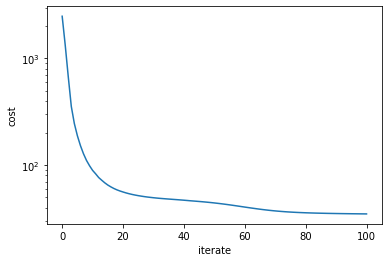

In [21]:
import matplotlib.pyplot as plt

plt.semilogy(cost_arr)
plt.xlabel('iterate')
plt.ylabel('cost')

## Generalization error

In [27]:
def gen_err(Upred, Utrue):
    norm_true = kr_dot(Utrue, Utrue)
    mse_gen = kr_dot(Upred, Upred) + norm_true - 2 * kr_dot(Upred, Utrue)
    return np.sqrt(mse_gen / norm_true)

def mse_gen_err(Upred, Utrue):
    norm_true = kr_dot(Utrue, Utrue)
    mse_gen = kr_dot(Upred, Upred) + norm_true - 2 * kr_dot(Upred, Utrue)
    return np.sqrt(mse_gen / Upred[0].shape[0] ** len(Upred))

print("relative RMSE max:      %1.4e" % gen_err(Unew2, U))
print("MSE max:                %1.4e" % mse_gen_err(Unew2, U))

relative RMSE max:      2.2319e-02
MSE max:                2.2319e-02


/home/kamdh/local/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Casting input data from 'float128' to 'float64' for imshow
  fig.canvas.print_figure(bytes_io, **kw)


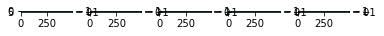

In [23]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axs = plt.subplots(1,t, figsize=(6, 20))
for i in range(t):
    im = axs[i].imshow(Unew2[i])
    divider = make_axes_locatable(axs[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    if i > 0:
        axs[i].set_yticks([])

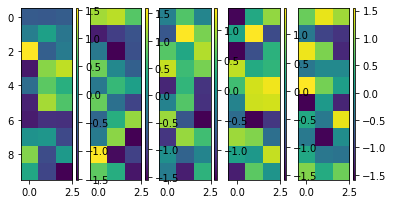

In [24]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axs = plt.subplots(1,t, figsize=(6, 20))
for i in range(t):
    im = axs[i].imshow(U[i])
    divider = make_axes_locatable(axs[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    if i > 0:
        axs[i].set_yticks([])